In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r"D:\MachineLearning\Projects\Kaggle\Ventilator_Pressure_Prediction_Kaggle\Data\ventilator-pressure-prediction\train.csv")
#data.drop(columns=['id'], inplace=True)
data_test = pd.read_csv(r"D:\MachineLearning\Projects\Kaggle\Ventilator_Pressure_Prediction_Kaggle\Data\ventilator-pressure-prediction\test.csv")
data_train = data.loc[:, data.columns != 'pressure']
data_train_target = data.loc[:, data.columns == 'pressure']

In [6]:
##Question to explore:
# (1) are all breath splitted into 80 time steps in this data?
time_step_foreach_breath = data.groupby(['breath_id'])[['time_step']].count()
unique_values = time_step_foreach_breath['time_step'].unique()

time_step_foreach_breath_test = data_test.groupby(['breath_id'])[['time_step']].count()
unique_values_test = time_step_foreach_breath_test['time_step'].unique()
unique_values_test
#answer: yes, all breath are aplit into 80 time steps in training set & test set

array([80], dtype=int64)

<AxesSubplot:xlabel='breath_id', ylabel='pressure'>

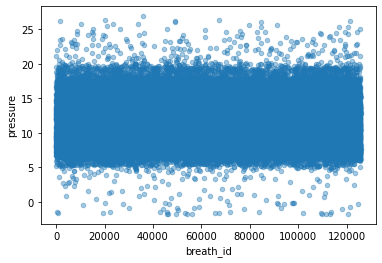

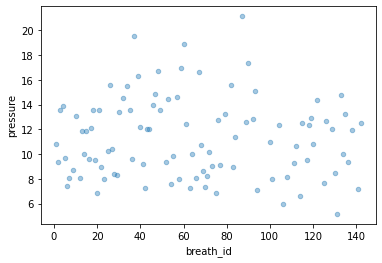

In [7]:
# (2) does breath_id affects the pressure? Is breath_id time based? The longer you are on ventilator, the higher average pressure
##your lung have?
data_groupby_breathid = data.groupby(['breath_id'])[['pressure']].mean()
data_groupby_breathid.reset_index(inplace=True)
data_groupby_breathid.columns = ['breath_id','pressure']

data_groupby_breathid.plot(kind="scatter", x="breath_id", y="pressure",alpha=0.4)

#answer seems like there is no relationship...
first_100_breath = data_groupby_breathid.head(100)
first_100_breath.plot(kind="scatter", x="breath_id", y="pressure",alpha=0.4)

<AxesSubplot:xlabel='u_in', ylabel='pressure'>

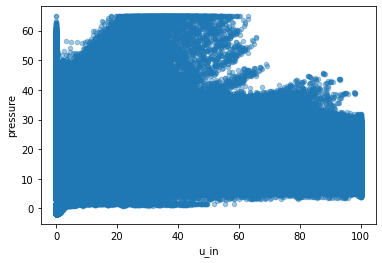

In [8]:
# (3) does each input valve % openning correspond to a fixed lung pressure?
data.plot(kind="scatter", x="u_in", y="pressure",alpha=0.4)

#insight: for a given input value % openning, it doesn't have a fixed lung pressure. But it seems that as input value opens
#pass roughly 50%, the pressure flunctuates between (0,40) instead of (0,70)

<AxesSubplot:xlabel='u_in', ylabel='pressure'>

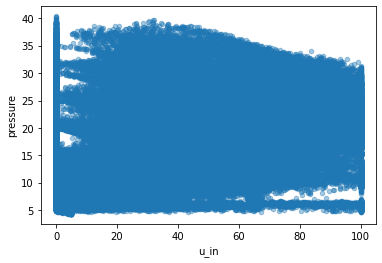

In [9]:
# (3b) does each input valve % openning correspond to a fixed lung pressure? fix R and C
data_chooseR_C = data[(data['R'] == 5) & (data['C'] == 50)]
data_chooseR_C.plot(kind="scatter", x="u_in", y="pressure",alpha=0.4)

<AxesSubplot:xlabel='breath_id', ylabel='pressure'>

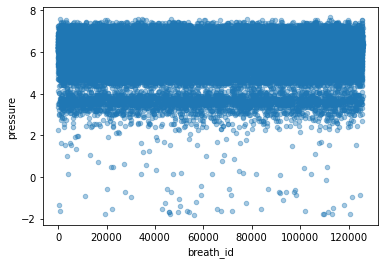

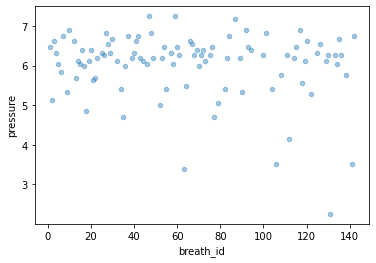

In [10]:
# (4) does the data show the effect of PEEP?
data_PEEP = data.groupby(['breath_id']).tail(1)

data_PEEP.plot(kind="scatter", x="breath_id", y="pressure",alpha=0.4)
data_PEEP.head(100).plot(kind="scatter", x="breath_id", y="pressure",alpha=0.4)
#insight: for a given input value % openning, it doesn't have a fixed lung pressure. But it seems that as input value opens
#pass roughly 50%, the pressure flunctuates between (0,40) instead of (0,70)

<AxesSubplot:xlabel='breath_id', ylabel='pressure'>

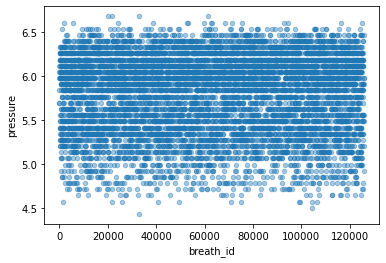

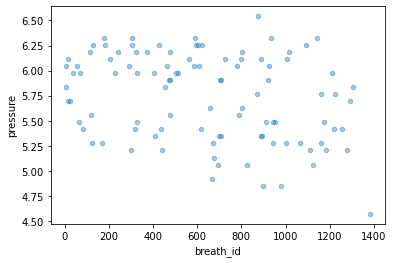

In [11]:
# (5) does the data show the effect of PEEP for a given R & C value?
data_chooseR_C = data[(data['R'] == 5) & (data['C'] == 50)]
data_PEEP = data_chooseR_C.groupby(['breath_id']).tail(1)

data_PEEP.plot(kind="scatter", x="breath_id", y="pressure",alpha=0.4)
data_PEEP.head(100).plot(kind="scatter", x="breath_id", y="pressure",alpha=0.4)

<AxesSubplot:xlabel='breath_id', ylabel='pressure'>

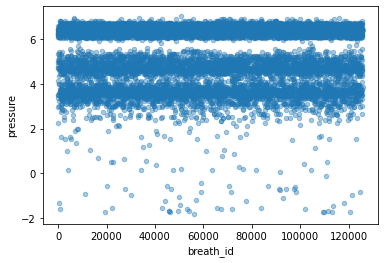

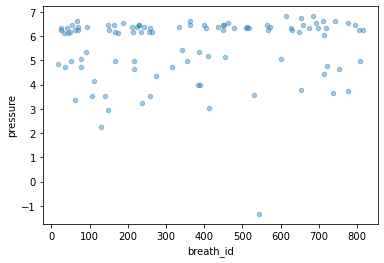

In [12]:
# (6) does the data show the effect of PEEP for a given R & C value?
data_chooseR_C = data[(data['R'] == 50) & (data['C'] == 10)]
data_PEEP = data_chooseR_C.groupby(['breath_id']).tail(1)

data_PEEP.plot(kind="scatter", x="breath_id", y="pressure",alpha=0.4)
data_PEEP.head(100).plot(kind="scatter", x="breath_id", y="pressure",alpha=0.4)

<AxesSubplot:xlabel='breath_id', ylabel='pressure'>

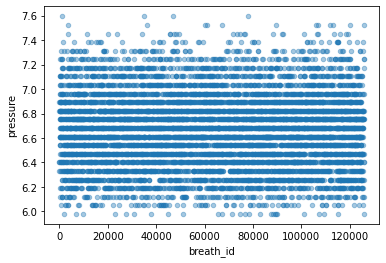

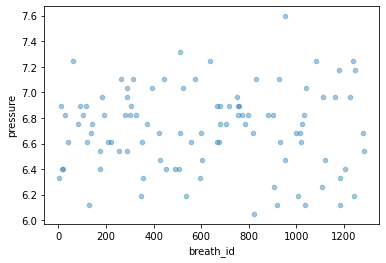

In [13]:
# (7) does the data show the effect of PEEP for a given R & C value?
data_chooseR_C = data[(data['R'] == 50) & (data['C'] == 50)]
data_PEEP = data_chooseR_C.groupby(['breath_id']).tail(1)

data_PEEP.plot(kind="scatter", x="breath_id", y="pressure",alpha=0.4)
data_PEEP.head(100).plot(kind="scatter", x="breath_id", y="pressure",alpha=0.4)

<AxesSubplot:xlabel='breath_id', ylabel='pressure'>

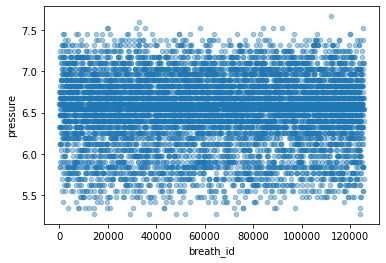

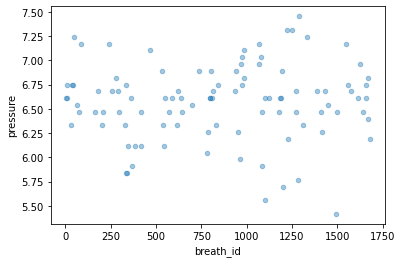

In [14]:
# (8) does the data show the effect of PEEP for a given R & C value?
data_chooseR_C = data[(data['R'] == 50) & (data['C'] == 20)]
data_PEEP = data_chooseR_C.groupby(['breath_id']).tail(1)

data_PEEP.plot(kind="scatter", x="breath_id", y="pressure",alpha=0.4)
data_PEEP.head(100).plot(kind="scatter", x="breath_id", y="pressure",alpha=0.4)

<AxesSubplot:xlabel='time_step', ylabel='pressure'>

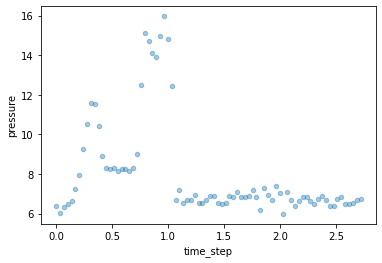

In [15]:
# (9) how does one breath look like

data[(data['breath_id'] == 7)].plot(kind="scatter", x="time_step", y="pressure",alpha=0.4)

<AxesSubplot:xlabel='u_in', ylabel='pressure'>

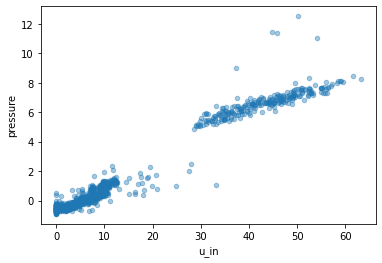

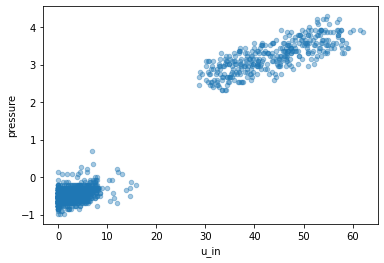

In [54]:
#(10) at time_step 0, how does u_in affect pressure
data_time_step0 = data_chooseR_C[(data_chooseR_C['time_step'] >0.06) & (data_chooseR_C['time_step'] < 0.064) & (data_chooseR_C['R'] ==20) & (data_chooseR_C['C'] ==20)]

data_time_step0.plot(kind="scatter", x="u_in", y="pressure",alpha=0.4)
data_time_step0 = data_chooseR_C[(data_chooseR_C['time_step'] >0.031) & (data_chooseR_C['time_step'] < 0.032) & (data_chooseR_C['R'] ==20) & (data_chooseR_C['C'] ==20)]

data_time_step0.plot(kind="scatter", x="u_in", y="pressure",alpha=0.4)

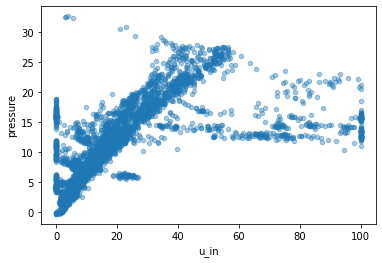

In [42]:
data_time_step0.plot(kind="scatter", x="u_in", y="pressure",alpha=0.4)
data_time_step0 = data_chooseR_C[(data_chooseR_C['time_step'] >0.404) & (data_chooseR_C['time_step'] < 0.418) & (data_chooseR_C['R'] ==20) & (data_chooseR_C['C'] ==20)]


<ipython-input-17-259bdbb45ea5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chooseR_C['pressure'] = data_chooseR_C['pressure'].sub(data_chooseR_C.groupby('breath_id')['pressure'].transform('first'))


,breath_id,R,C,time_step,u_in,u_out,pressure
80,2,20,20,0.000000,12.184338,0,0.000000
81,2,20,20,0.033998,13.980205,0,1.476345
82,2,20,20,0.068151,12.574163,0,3.233899
83,2,20,20,0.102062,11.730537,0,4.288431
84,2,20,20,0.135917,12.124229,0,3.796316
...,...,...,...,...,...,...,...
6033755,125702,20,20,2.554187,4.974503,1,1.616949
6033756,125702,20,20,2.588339,4.978506,1,1.687251
6033757,125702,20,20,2.622267,4.981859,1,1.616949
6033758,125702,20,20,2.656498,4.984713,1,1.898158


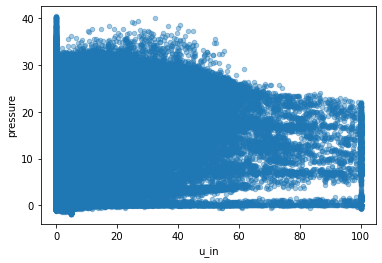

In [17]:
# (11) is there pattern when we look at pressure change istead of pressure?
data_chooseR_C = data[(data['R'] == 20) & (data['C'] == 20)]
data_chooseR_C['pressure'] = data_chooseR_C['pressure'].sub(data_chooseR_C.groupby('breath_id')['pressure'].transform('first'))
data_chooseR_C.plot(kind="scatter", x="u_in", y="pressure",alpha=0.4)
data_chooseR_C

In [64]:
time_step_mean = data.groupby('breath_id')[['time_step']].mean().reset_index()
time_step_mean.rename(columns={'time_step':'time_step_catagory'}, inplace=True)
time_step_catagory_df = pd.merge(data, time_step_mean, on=['breath_id'])
time_step_catagory_df.loc[time_step_catagory_df['time_step_catagory'] >=1.3 , 'time_step_catagory'] = 1
time_step_catagory_df.loc[(time_step_catagory_df['time_step_catagory'] < 1.3) & (time_step_catagory_df['time_step_catagory'] > 1), 'time_step_catagory'] = 0

In [120]:
catagory_0_df = time_step_catagory_df[(time_step_catagory_df['time_index'] == 10) & (time_step_catagory_df['time_step_catagory'] == 0) & (time_step_catagory_df['R'] ==20) & (time_step_catagory_df['C'] ==20) & (time_step_catagory_df['u_out'] ==0)]

<AxesSubplot:xlabel='u_in', ylabel='pressure'>

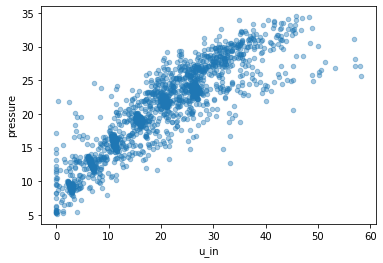

In [121]:
catagory_0_df.plot(kind="scatter", x="u_in", y="pressure",alpha=0.4)

In [55]:
time_step_catagory_df

,breath_id,R,C,time_step,u_in,u_out,pressure,time_step_catagory
0,1,20,50,0.000000,0.083334,0,5.837492,1.0
1,1,20,50,0.033652,18.383041,0,5.907794,1.0
2,1,20,50,0.067514,22.509278,0,7.876254,1.0
3,1,20,50,0.101542,22.808822,0,11.742872,1.0
4,1,20,50,0.135756,25.355850,0,12.234987,1.0
...,...,...,...,...,...,...,...,...
6035995,125749,50,10,2.504603,1.489714,1,3.869032,1.0
6035996,125749,50,10,2.537961,1.488497,1,3.869032,1.0
6035997,125749,50,10,2.571408,1.558978,1,3.798729,1.0
6035998,125749,50,10,2.604744,1.272663,1,4.079938,1.0


In [62]:
data['time_index'] = (data['id']-1).mod(80)

In [124]:
time_step_catagory_df

,id,breath_id,R,C,time_step,u_in,u_out,pressure,time_index,time_step_catagory
0,1,1,20,50,0.000000,0.083334,0,5.837492,0,1.0
1,2,1,20,50,0.033652,18.383041,0,5.907794,1,1.0
2,3,1,20,50,0.067514,22.509278,0,7.876254,2,1.0
3,4,1,20,50,0.101542,22.808822,0,11.742872,3,1.0
4,5,1,20,50,0.135756,25.355850,0,12.234987,4,1.0
...,...,...,...,...,...,...,...,...,...,...
6035995,6035996,125749,50,10,2.504603,1.489714,1,3.869032,75,1.0
6035996,6035997,125749,50,10,2.537961,1.488497,1,3.869032,76,1.0
6035997,6035998,125749,50,10,2.571408,1.558978,1,3.798729,77,1.0
6035998,6035999,125749,50,10,2.604744,1.272663,1,4.079938,78,1.0


In [123]:
time_step_catagory_df.to_csv(r"D:\MachineLearning\Projects\Kaggle\Ventilator_Pressure_Prediction_Kaggle\Output\time_index_catagory_df.csv", index=False)